<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/K_Nearest_Neighbors_(KNN)_Exploratory_Data_Analysis_Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict wine quality based on the given physicochemical tests.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = http://bit.ly/WineQualityDatasetSource
# ---
#

In [ ]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [ ]:
df = pd.read_csv('winequality_red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.shape

(1599, 12)

In [ ]:
# Checking the unique values in the target variable 
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64



## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
df.shape

(1599, 12)

In [ ]:
# Previewing the top of our dataset
#
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

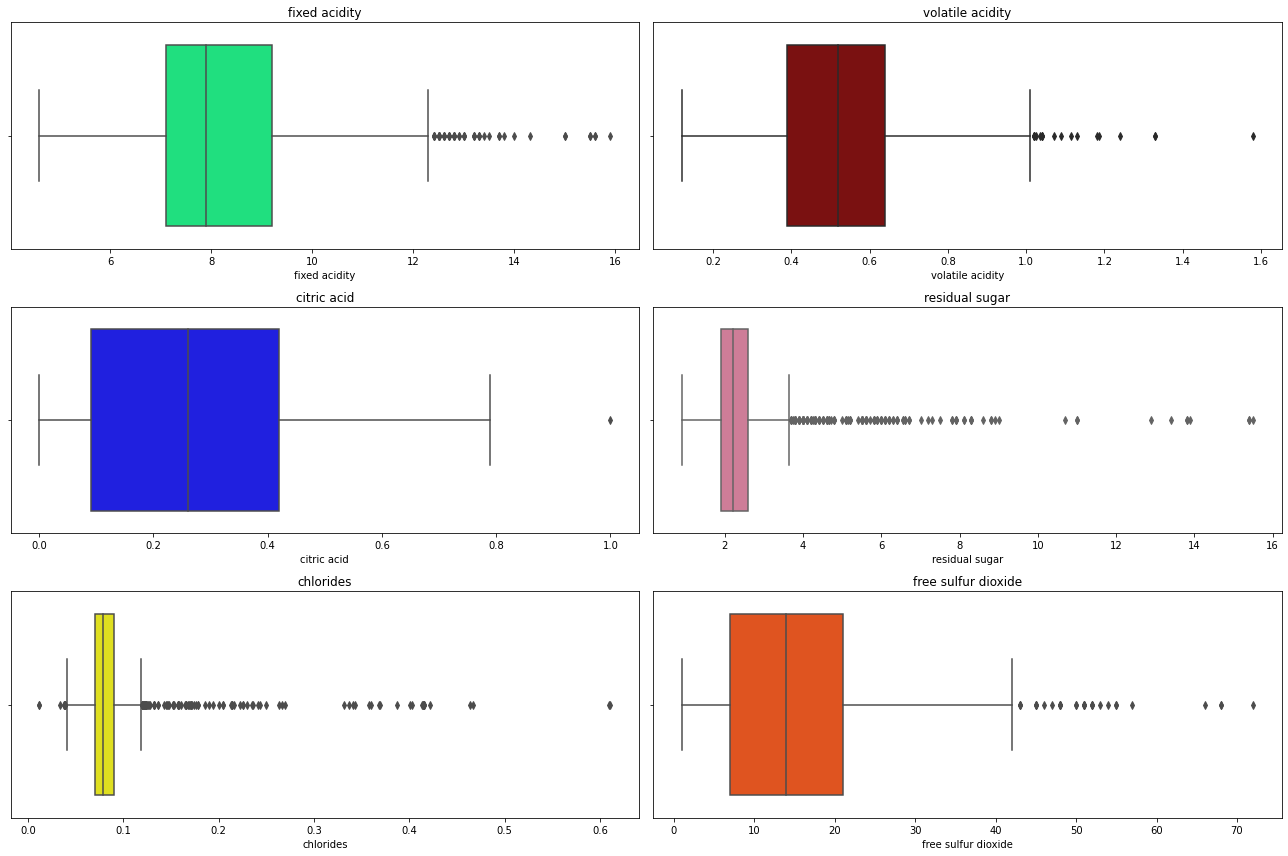

In [ ]:
# Checking for Outliers
#
# Determine outlier in data

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, colour, ax in zip(columns, colors, axes.flatten()):
  
  sns.boxplot(df[col],  ax=ax, color=colour)
  ax.set_title(f'{col}')

plt.tight_layout()

In [ ]:
# Checking for Anomalies and removing outliers
#
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df_out.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)
 

(1179, 12)
(1599, 12)


In [ ]:
df_out.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_quality=df_out

In [ ]:
# Identifying the Missing Data
#
df_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Dealing with the Missing Data
#
# No missing data

In [ ]:
# More data cleaning procedures
#
df_quality.duplicated().any()

True

## 6. Exploratory Analysis

In [ ]:
df_quality.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [ ]:
df_quality.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.271010,0.659397,0.229653,0.197774,-0.150845,-0.087083,0.610125,-0.684378,0.165367,-0.037999,0.113422
volatile acidity,-0.271010,1.000000,-0.627194,0.035215,0.117805,-0.016718,0.097487,0.044174,0.220702,-0.317346,-0.220600,-0.346962
citric acid,0.659397,-0.627194,1.000000,0.149494,0.073031,-0.068852,0.004660,0.305458,-0.470286,0.256747,0.137762,0.212133
residual sugar,0.229653,0.035215,0.149494,1.000000,0.232752,0.088405,0.199534,0.394732,-0.054684,0.040172,0.098175,0.007934
chlorides,0.197774,0.117805,0.073031,0.232752,1.000000,0.012326,0.176938,0.411902,-0.175758,-0.076853,-0.300750,-0.190869
free sulfur dioxide,-0.150845,-0.016718,-0.068852,0.088405,0.012326,1.000000,0.619675,-0.021505,0.149126,0.107455,-0.022415,-0.003609
total sulfur dioxide,-0.087083,0.097487,0.004660,0.199534,0.176938,0.619675,1.000000,0.149847,0.010031,-0.049655,-0.245125,-0.203374
density,0.610125,0.044174,0.305458,0.394732,0.411902,-0.021505,0.149847,1.000000,-0.227471,0.081691,-0.538901,-0.215375
pH,-0.684378,0.220702,-0.470286,-0.054684,-0.175758,0.149126,0.010031,-0.227471,1.000000,0.013972,0.126747,-0.060288
sulphates,0.165367,-0.317346,0.256747,0.040172,-0.076853,0.107455,-0.049655,0.081691,0.013972,1.000000,0.260783,0.413533


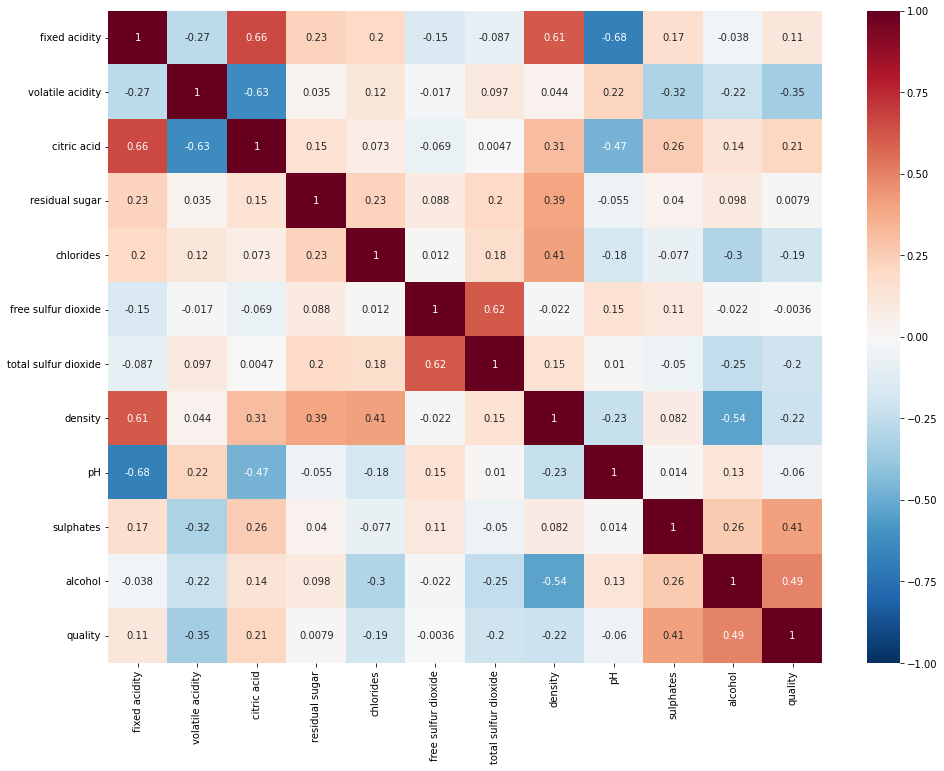

In [ ]:
correlation = df_quality.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [ ]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.492551
sulphates               0.413533
citric acid             0.212133
fixed acidity           0.113422
residual sugar          0.007934
free sulfur dioxide    -0.003609
pH                     -0.060288
chlorides              -0.190869
total sulfur dioxide   -0.203374
density                -0.215375
volatile acidity       -0.346962
Name: quality, dtype: float64

In [ ]:
# Plotting bivariate summaries

# alcohol vs quality 

In [ ]:
df_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

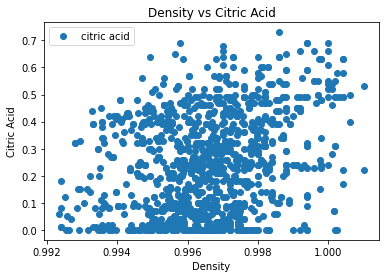

In [ ]:
import matplotlib.pyplot as plt

df_quality.plot(x='density', y='citric acid', style='o')
plt.title('Density vs Citric Acid')
plt.xlabel('Density')
plt.ylabel('Citric Acid')
plt.show()
# Evident positive relationship

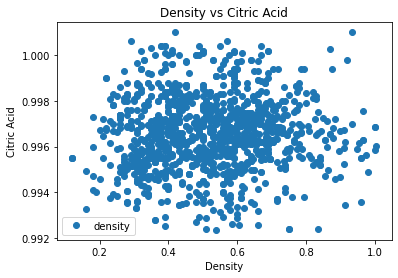

In [ ]:
import matplotlib.pyplot as plt

df_quality.plot(x='volatile acidity', y='density', style='o')
plt.title('Density vs Citric Acid')
plt.xlabel('Density')
plt.ylabel('Citric Acid')
plt.show()

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
#

In [ ]:
# This is a classification challenge 



In [ ]:
df_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Splitting the dataset into its attributes and labels 

X = df_quality[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values
y = df_quality['quality'].values

In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# --
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   8   8   0]
 [  1 134  72   4]
 [  0  58 122   6]
 [  0   5  35  19]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.65      0.64      0.64       211
           6       0.51      0.66      0.58       186
           7       0.66      0.32      0.43        59

    accuracy                           0.58       472
   macro avg       0.46      0.40      0.41       472
weighted avg       0.58      0.58      0.57       472



In [ ]:
# The model accuracy is quite low at 60%

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Applying PCA to improve accuracy

In [ ]:
pca = PCA(n_components=3).fit(df_quality)
X = pca.transform(df_quality)
X.shape

(1179, 3)

In [ ]:
y = df_quality['quality'].values

In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# --
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  7  4  0]
 [ 0 76 80  5]
 [ 0 66 74  2]
 [ 0 21 16  3]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.45      0.47      0.46       161
           6       0.43      0.52      0.47       142
           7       0.30      0.07      0.12        40

    accuracy                           0.43       354
   macro avg       0.29      0.27      0.26       354
weighted avg       0.41      0.43      0.41       354



In [ ]:
# Reviewing the Solution 
# PCA does not improve accuracy

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?